In [1]:
library(fitHeavyTail)
library(xts)
library(quantmod)
library(igraph)
library(bipartite)
library(readr)
set.seed(42)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: spectralGraphTopology


Attaching package: ‘spectralGraphTopology’


The following object is masked from ‘package:stats’:

    D


Loading required package: devtools

Loading required package: usethis



In [2]:
# load SP500 stock price data
stock_prices <- readRDS("sp500-data-2016-2021.rds")
# number of sectors
q <- 8
# number of stocks
r <- ncol(stock_prices) - q
# total nodes in the graph
p <- r + q
colnames(stock_prices)[1:r]
colnames(stock_prices)[(r+1):p]

[1] "A"    "AAL"  "ABBV" "ABC"  "ABMD" "ABT"  "ADM"  "AEE"  "AEP"  "AES" 
 [11] "AFL"  "AIG"  "AIV"  "AIZ"  "AJG"  "ALB"  "ALGN" "ALK"  "ALL"  "ALLE"
 [21] "ALXN" "AMCR" "AME"  "AMGN" "AMP"  "AMT"  "ANTM" "AON"  "AOS"  "APA" 
 [31] "APD"  "ARE"  "ATO"  "AVB"  "AVY"  "AWK"  "AXP"  "BA"   "BAC"  "BAX" 
 [41] "BDX"  "BEN"  "BIIB" "BIO"  "BK"   "BKR"  "BLK"  "BLL"  "BMY"  "BSX" 
 [51] "BXP"  "C"    "CAG"  "CAH"  "CAT"  "CB"   "CBOE" "CBRE" "CCI"  "CE"  
 [61] "CERN" "CF"   "CFG"  "CHD"  "CHRW" "CI"   "CINF" "CL"   "CLX"  "CMA" 
 [71] "CME"  "CMI"  "CMS"  "CNC"  "CNP"  "COF"  "COG"  "COO"  "COP"  "COST"
 [81] "COTY" "CPB"  "CPRT" "CSX"  "CTAS" "CVS"  "CVX"  "D"    "DAL"  "DD"  
 [91] "DE"   "DFS"  "DGX"  "DHR"  "DLR"  "DOV"  "DRE"  "DTE"  "DUK"  "DVA" 
[101] "DVN"  "DXCM" "ECL"  "ED"   "EFX"  "EIX"  "EL"   "EMN"  "EMR"  "EOG" 
[111] "EQIX" "EQR"  "ES"   "ESS"  "ETN"  "ETR"  "EVRG" "EW"   "EXC"  "EXPD"
[121] "EXR"  "FANG" "FAST" "FBHS" "FCX"  "FDX"  "FE"   "FITB" "FLS"  "FMC" 
[131] "FRC"  "FRT"  "FTI"  "GD"   "GE"   "GILD" "GIS"  "GL"   "GS"   "GWW" 
[141] "HAL"  "HBAN" "HCA"  "HES"  "HFC"  "HIG"  "HII"  "HOLX" "HON"  "HRL" 
[151] "HSIC" "HST"  "HSY"  "HUM"  "HWM"  "ICE"  "IDXX" "IEX"  "IFF"  "ILMN"
[161] "INCY" "INFO" "IP"   "IQV"  "IRM"  "ISRG" "ITW"  "IVZ"  "J"    "JBHT"
[171] "JCI"  "JNJ"  "JPM"  "K"    "KEY"  "KHC"  "KIM"  "KMB"  "KMI"  "KO"  
[181] "KR"   "KSU"  "L"    "LH"   "LHX"  "LIN"  "LLY"  "LMT"  "LNC"  "LNT" 
[191] "LUV"  "LYB"  "MAA"  "MAS"  "MCK"  "MCO"  "MDLZ" "MDT"  "MET"  "MKC" 
[201] "MKTX" "MLM"  "MMC"  "MMM"  "MNST" "MO"   "MOS"  "MPC"  "MRK"  "MRO" 
[211] "MS"   "MSCI" "MTB"  "MTD"  "NDAQ" "NEE"  "NEM"  "NI"   "NLSN" "NOC" 
[221] "NOV"  "NRG"  "NSC"  "NTRS" "NUE"  "O"    "ODFL" "OKE"  "OXY"  "PBCT"
[231] "PCAR" "PEAK" "PEG"  "PEP"  "PFE"  "PFG"  "PG"   "PGR"  "PH"   "PKG" 
[241] "PKI"  "PLD"  "PM"   "PNC"  "PNR"  "PNW"  "PPG"  "PPL"  "PRGO" "PRU" 
[251] "PSA"  "PSX"  "PWR"  "PXD"  "RE"   "REG"  "REGN" "RF"   "RHI"  "RJF" 
[261] "RMD"  "ROK"  "ROL"  "ROP"  "RSG"  "RTX"  "SBAC" "SCHW" "SEE"  "SHW" 
[271] "SIVB" "SJM"  "SLB"  "SLG"  "SNA"  "SO"   "SPG"  "SPGI" "SRE"  "STE" 
[281] "STT"  "STZ"  "SWK"  "SYF"  "SYK"  "SYY"  "TAP"  "TDG"  "TDY"  "TFC" 
[291] "TFX"  "TMO"  "TROW" "TRV"  "TSN"  "TT"   "TXT"  "UAL"  "UDR"  "UHS" 
[301] "UNH"  "UNM"  "UNP"  "UPS"  "URI"  "USB"  "VAR"  "VLO"  "VMC"  "VNO" 
[311] "VRSK" "VRTX" "VTR"  "WAB"  "WAT"  "WBA"  "WEC"  "WELL" "WFC"  "WLTW"
[321] "WM"   "WMB"  "WMT"  "WRB"  "WST"  "WY"   "XEL"  "XOM"  "XRAY" "XYL" 
[331] "ZBH"  "ZION" "ZTS"

[1] "XLP"  "XLE"  "XLF"  "XLV"  "XLI"  "XLB"  "XLRE" "XLU"

In [3]:
selected_sectors <- c("Consumer Staples", "Energy", "Financials",
                      "Health Care","Industrials",
                      "Materials", "Real Estate", "Utilities")

In [4]:
log_returns <- diff(log(stock_prices), na.pad = FALSE)

In [5]:
# fit an univariate Student-t distribution to the log-returns of the market
# to obtain an estimate of the degrees of freedom (nu)
mkt_index <- Ad(getSymbols("^GSPC",
              from = index(stock_prices[1]), to = index(stock_prices[nrow(stock_prices)]), 
              auto.assign = FALSE, 
              verbose = FALSE))
mkt_index_log_returns <- diff(log(mkt_index), na.pad = FALSE)
nu <- fit_mvt(mkt_index_log_returns,
              nu="MLE-diag-resampled")$nu

In [6]:
# learn a bipartite graph with k = 8 components
graph_mrf <- learn_heavy_tail_kcomp_bipartite_graph(scale(log_returns),
                                                    r = r,
                                                    q = q,
                                                    k = 8,
                                                    nu = nu,
                                                    learning_rate = 1,
                                                    verbose = FALSE)

In [7]:
# predicted labels
labels_pred <- c()
for(i in c(1:r)){
    labels_pred <- c(labels_pred, which.max(graph_mrf$B[i, ]))
}

In [8]:
# build network
SP500 <- read_csv("SP500-sectors.csv")
stock_sectors <- SP500$GICS.Sector[SP500$Symbol %in% colnames(stock_prices)[1:r]]
stock_sectors_index <- as.numeric(as.factor(stock_sectors))
net <- graph_from_adjacency_matrix(graph_mrf$adjacency, mode = "undirected", weighted = TRUE)
colors <- c("#55efc4", "#ff7675", "#0984e3", "#a29bfe", "#B33771", "#48dbfb", "#FDA7DF", "#C4E538")
V(net)$color <- c(colors[stock_sectors_index], colors)
V(net)$type <- c(rep(FALSE, r), rep(TRUE, q))
V(net)$cluster <- c(stock_sectors_index, c(1:q))
E(net)$color <- apply(as.data.frame(get.edgelist(net)), 1,
                     function(x) ifelse(V(net)$cluster[x[1]] == V(net)$cluster[x[2]],
                                        colors[V(net)$cluster[x[1]]], 'grey'))

New names:
* `` -> ...1

Rows: 505 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Symbol, GICS.Sector
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# where do our predictions differ from GICS?
mask <- labels_pred != stock_sectors_index
node_labels <- colnames(stock_prices)[1:r]
node_labels[!mask] <- NA

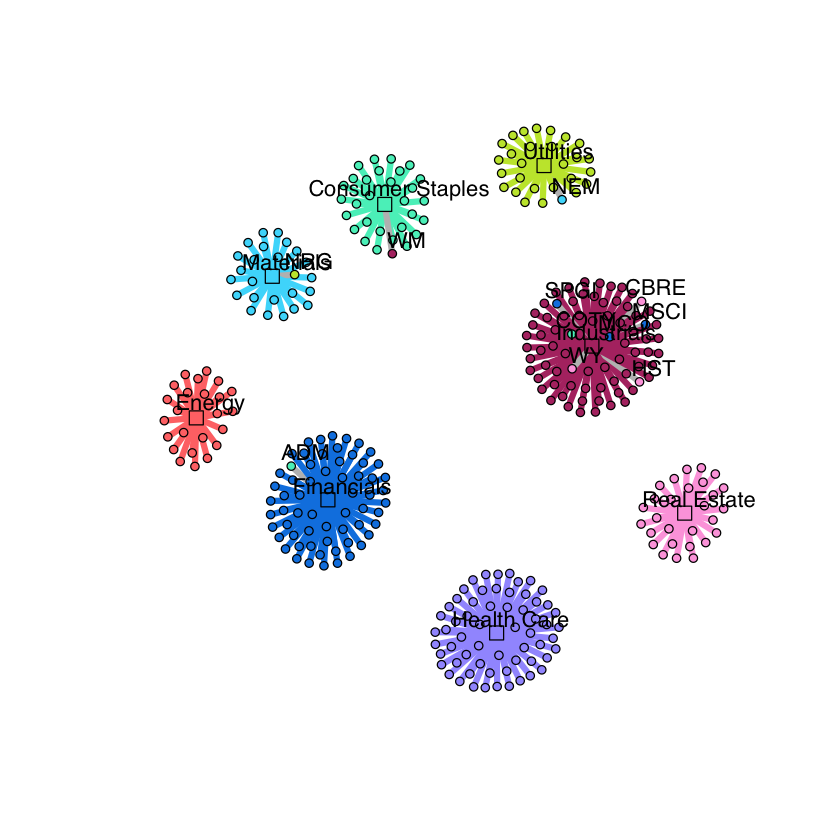

In [10]:
# plot graph
la <- layout_nicely(net)
plot(net, vertex.size = c(rep(3, r), rep(5, q)),
     vertex.label = c(node_labels, selected_sectors),
     vertex.label.cex = 1.1, vertex.label.dist = 1.0,
     layout = la,
     vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.shape = c(rep("circle", r), rep("square", q)),
     edge.width = 5*(E(net)$weight))